# Pymaceuticals Inc.
---

### Analysis

We analyzed the results of 10 cancer treatment drugs on the tumor volume in 248 mice over the course of 45 days.  

We included the results of all mice except one, who had duplicate measurements that conflicted with one another.  

In these results, you can find a statistical analysis of the effects of each drug on tumor size, including mean, median, variance, standard deviation, and standard error of mean.

Next you will see a bar chart showing how many measurements were used in the analysis for each drug, showing Capomulin and Ramicane (approximately 250) with the most measurements and Propriva with the fewest (approximately 150).  

After that, a pie chart shows that the number of male mice and female mice in the study was essentially equal (male = 51%, female = 49%).

Finally, you will see an box plot analysis of the final tumor volumes for the mice in 4 of the drug treatment groups, including Capomulin and Ramicane, which shows significantly smaller tumor volumes at the end of treatment with outliers for Infubinol showing in the same range as the two top drugs.  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_results["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# no_duplicated_results = mouse_results.drop_duplicates(keep = "first", subset = ["Mouse ID", "Timepoint"])
duplicate_results = mouse_results[mouse_results[["Mouse ID", "Timepoint"]].duplicated() == True]
print(f"The mouse with duplicate data is mouse {duplicate_results.iloc[1][0]}.")


The mouse with duplicate data is mouse g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results = mouse_results[mouse_results["Mouse ID"] == "g989"]
duplicate_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = mouse_results[mouse_results["Mouse ID"] != "g989"]
clean_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mouse_count = len(clean_results["Mouse ID"].unique())
final_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
avg_tumor_vol = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol.rename("Average Tumor Volume",inplace = True)
median_tumor_vol = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median_tumor_vol.rename("Median Tumor Volume",inplace = True)
var_tumor_vol = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
var_tumor_vol.rename("Variance of Tumor Volumes",inplace = True)
stdev_tumor_vol = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
stdev_tumor_vol.rename("Standard Deviation of Tumor Volumes",inplace = True)
sem_tumor_vol = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
sem_tumor_vol.rename("Standard Error of Mean of Tumor Volumes",inplace = True)

# Assemble the resulting series into a single summary DataFrame.
tumor_stats_by_drug = pd.concat([avg_tumor_vol, median_tumor_vol, var_tumor_vol, stdev_tumor_vol, sem_tumor_vol], axis = 1)
tumor_stats_by_drug

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,Standard Deviation of Tumor Volumes,Standard Error of Mean of Tumor Volumes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Measurements per Drug'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

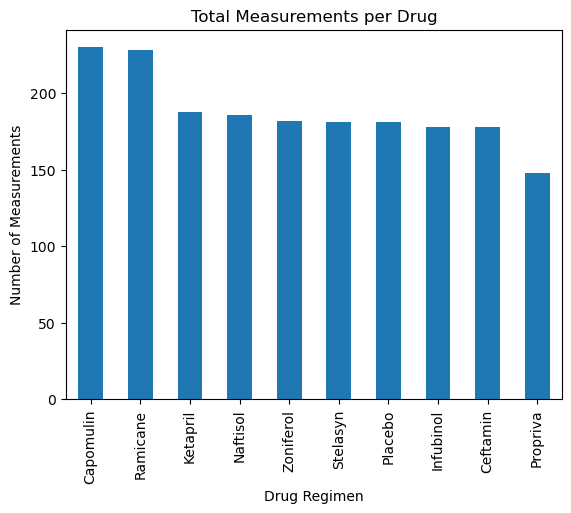

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
unique_drug_regimens = clean_results["Drug Regimen"].unique()
#x_axis = np.arange(len(unique_drug_regimens))
y_axis = clean_results["Drug Regimen"].value_counts()
y_axis.plot(kind = "bar", 
            title = "Total Measurements per Drug", 
            ylabel = "Number of Measurements", 
            xlabel = "Drug Regimen")


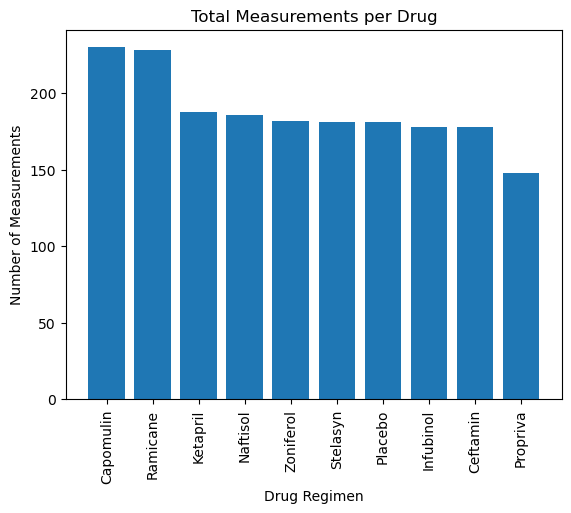

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
unique_drug_regimens = clean_results["Drug Regimen"].unique()
#x_axis = np.arange(len(unique_drug_regimens))
plt.bar(y_axis.index, y_axis)
plt.title("Total Measurements per Drug") 
plt.ylabel("Number of Measurements") 
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()        

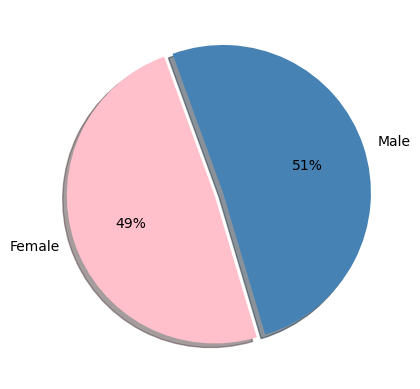

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["pink", "steelblue"]
explode = [0.03, 0.03]
#y_axis = clean_results["Sex"].value_counts()
y_axis = clean_results.groupby("Sex").size()
gender_pie = y_axis.plot(kind="pie", 
                                                       autopct="%1.0f%%", 
                                                       y=["Sex"], 
                                                       colors = colors, 
                                                       explode = explode, 
                                                       shadow = True, 
                                                       startangle=110)

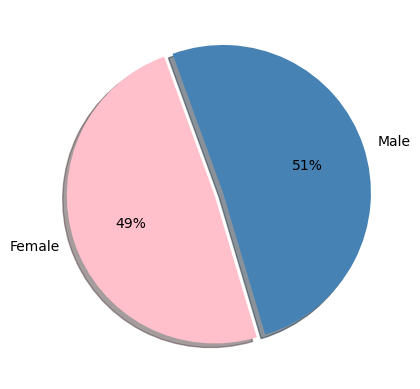

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(y_axis, 
        labels = ["Female", "Male"], 
        autopct="%1.00f%%", 
        colors = ["pink", "steelblue"], 
        shadow = True,
        startangle=110, 
        explode = [0.03, 0.03])

plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_results.groupby(["Mouse ID"]) ["Timepoint"].max()
last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#clean_results["Final Tumor Volume"] = 
final_tumor_volume = pd.merge(last_timepoint, clean_results, how = "left", on = ["Mouse ID", "Timepoint"])
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:  #final_tumor_volume
    data_by_drug = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vols.append(data_by_drug)
    quartiles = data_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers_by_drug = data_by_drug[((data_by_drug<lower_bound) | (data_by_drug>upper_bound))]
    print(f"{drug}'s outliers are: {outliers_by_drug}.")
    outliers.append(outliers_by_drug)
    #print(quartiles)
    #print(outliers)

Capomulin's outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64).


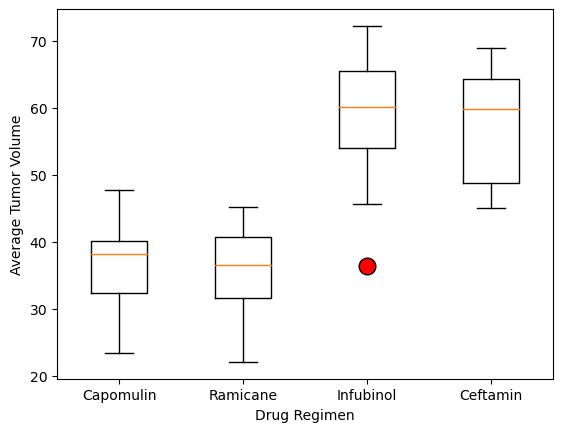

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vols, labels = treatments, flierprops=dict(markerfacecolor='r', markersize=12))
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume")

#From link in challenge text:
# # change outlier point symbols
# axs[0, 2].boxplot(data, 0, 'gD')
# axs[0, 2].set_title('change outlier\npoint symbols')

# plt.boxplot(total_bill, patch_artist=True,
#             # Set facecolor and surrounding line to red
#             boxprops=dict(facecolor='r', color='r'))
# medianprops=dict(color='red')
# plt. 'flierprops': dict(color=c, markeredgecolor=c)

plt.show()

## Line and Scatter Plots

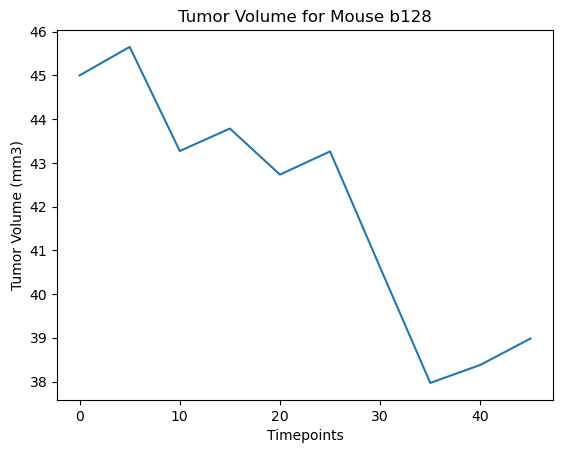

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = "b128"
cap_mouse_data = clean_results[clean_results["Mouse ID"] == capomulin_mouse]
cap_mouse_data = cap_mouse_data[["Timepoint", "Tumor Volume (mm3)"]]
y_axis = cap_mouse_data["Tumor Volume (mm3)"]
x_axis = cap_mouse_data["Timepoint"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume for Mouse b128")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

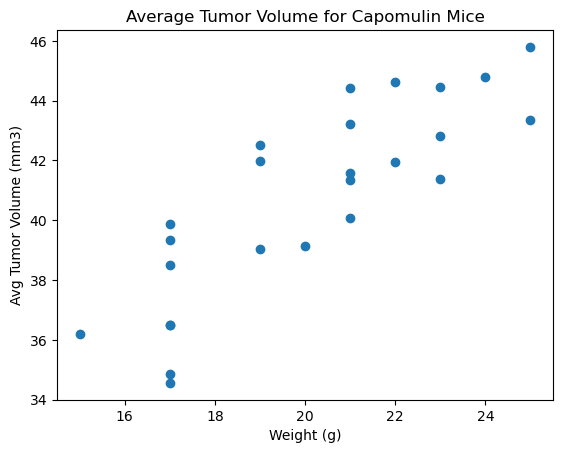

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_results[clean_results["Drug Regimen"] == "Capomulin"]
capomulin_avg_tumor_vol = capomulin_data.groupby(capomulin_data["Mouse ID"]) ["Tumor Volume (mm3)"].mean()
capomulin_avg_tumor_vol = pd.merge(capomulin_avg_tumor_vol, mouse_metadata, how = "left", on = "Mouse ID")
y_axis = capomulin_avg_tumor_vol["Tumor Volume (mm3)"]
x_axis = capomulin_avg_tumor_vol["Weight (g)"]
plt.scatter(x_axis, y_axis)
plt.title("Average Tumor Volume for Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()                           

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])
regress_values = capomulin_avg_tumor_vol["Weight (g)"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation:  {line_equation}")

The correlation between mouse weight and the average tumor volume is 0.84
Linear Regression Equation:  y = 0.95x + 21.55


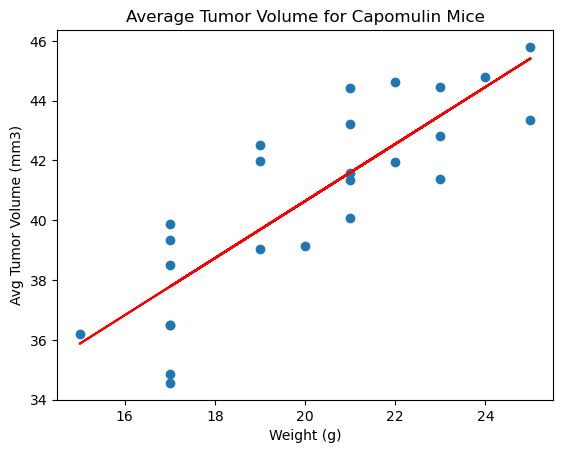

In [32]:
# Capomlin Data Scatter plot with linear reqression line
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, color = 'r')
plt.title("Average Tumor Volume for Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()   